In [20]:
#week 2 - assignment 1
import pandas as pd
data = pd.read_csv(r'C:\Users\varsh\Downloads\onlinefoods.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [21]:
missing_values = data.isnull().sum()
print("Missing values count per column:")
print(missing_values)

Missing values count per column:
Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


In [22]:
data_types = data.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
Unnamed: 12                    object
dtype: object


In [23]:
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


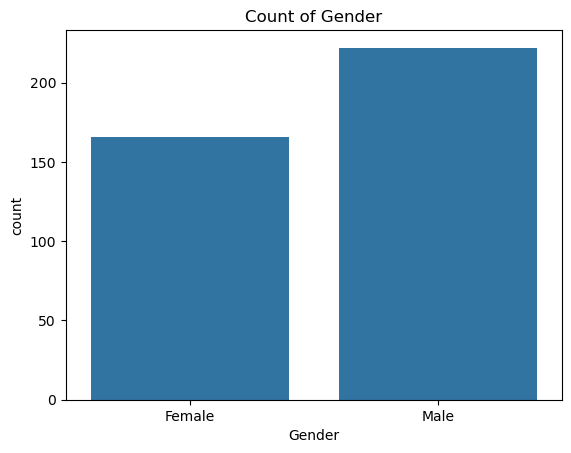

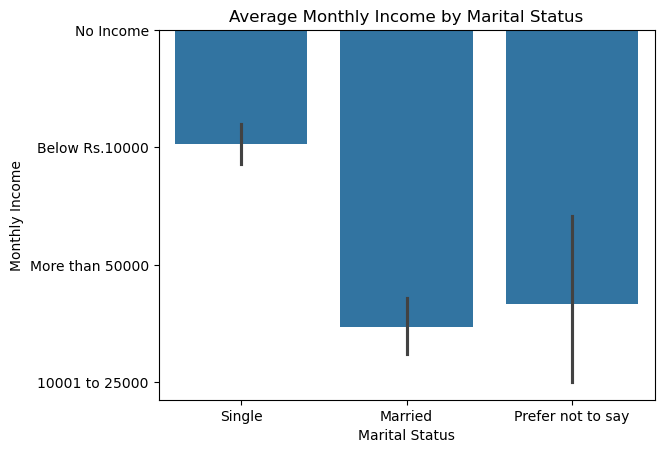

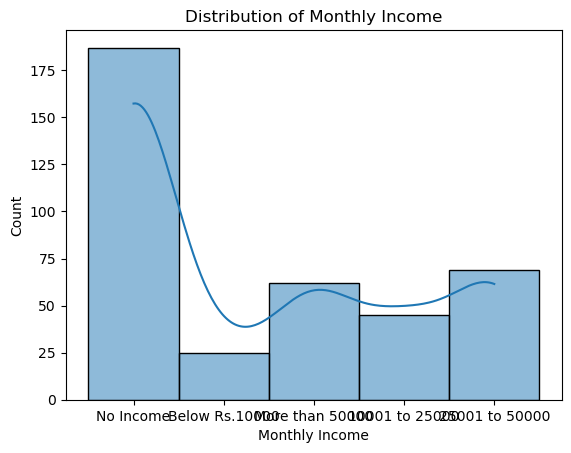

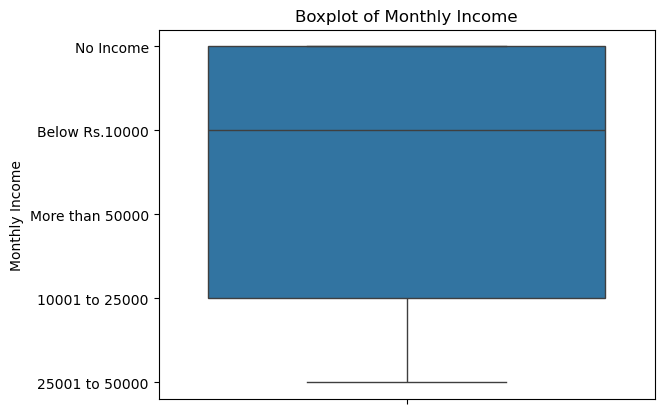

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Gender', data=data)
plt.title('Count of Gender')
plt.show()

# Bar plot for average Monthly Income by Marital Status
sns.barplot(x='Marital Status', y='Monthly Income', data=data)
plt.title('Average Monthly Income by Marital Status')
plt.show()

# Histogram for Monthly Income
sns.histplot(data['Monthly Income'], bins=20, kde=True)
plt.title('Distribution of Monthly Income')
plt.show()

# Boxplot for Monthly Income
sns.boxplot(data['Monthly Income'])
plt.title('Boxplot of Monthly Income')
plt.show()

In [25]:
#week 2 -assignment 2
import pandas as pd
data=pd.read_csv(r'C:\Users\varsh\Downloads\onlinefoods.csv')
print(data.columns)

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')


In [26]:
data['Feedback'] = data['Feedback'].map({'Positive': 1.0, 'Negative': 0.0,'Negative ':0.0})
data['Output'] = data['Output'].map({'Yes': 1.0, 'No': 0.0})

In [27]:
X = data['Feedback']
y = data['Output']
X = X.values.reshape(-1, 1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8547008547008547
F1-score: 0.911917098445596


In [30]:
#week 2 - assignment 3
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import string

movie_reviews = [
    "The movie was absolutely fantastic! I loved every minute of it.",
    "The acting was terrible and the plot was boring. I wouldn't recommend it.",
    "It was a decent movie, but nothing special.",
    "This film is a masterpiece. The cinematography and acting are top-notch."
]

In [31]:
tokenizer = RegexpTokenizer(r'\w+')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)
preprocessed_reviews = []
for review in movie_reviews:
    tokens = tokenizer.tokenize(review.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in punctuations]
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
    preprocessed_reviews.append(lemmatized_tokens)

for i, review in enumerate(preprocessed_reviews, 1):
    print(f"Review {i}: {' '.join(review)}")

Review 1: movi absolut fantast love everi minut
Review 2: act terribl plot bore recommend
Review 3: decent movi noth special
Review 4: film masterpiec cinematographi act top notch


In [32]:
#week 2-assignment 4
encoding="ISO-8859-1"
text_data = pd.read_csv(r'C:\Users\varsh\Downloads\spam.csv',encoding=encoding)
text_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
text_data = text_data[['v1', 'v2']]

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
    return ' '.join(tokens)
text_data['clean_text'] = text_data['v2'].apply(preprocess_text)

vectorizer = TfidfVectorizer()
X_combined_transformed = vectorizer.fit_transform(text_data['v2'])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined_transformed, text_data['v1'], test_size=0.2, random_state=42)

In [35]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, pos_label='spam')
print("F1-score:", f1)

Accuracy: 0.979372197309417
F1-score: 0.9181494661921707
